## week3. logistic regression

In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### 1. logistic regression

In [4]:
datafile='ex2data1.txt'
cols=np.loadtxt(datafile, delimiter=',', usecols=(0,1,2), unpack=True)
X=np.transpose(np.array(cols[:-1]))
y=np.transpose(np.array(cols[-1:]))
m=y.size #number of training examples
X=np.insert(X,0,1,axis=1)

In [10]:
#시각화
#positive classifiation, negative classifiacaion을 구분한다
#점 모양 자체를 구분하기 위함이다. 
pos = np.array([X[i] for i in range(X.shape[0]) if y[i] == 1])
neg = np.array([X[i] for i in range(X.shape[0]) if y[i] == 0])

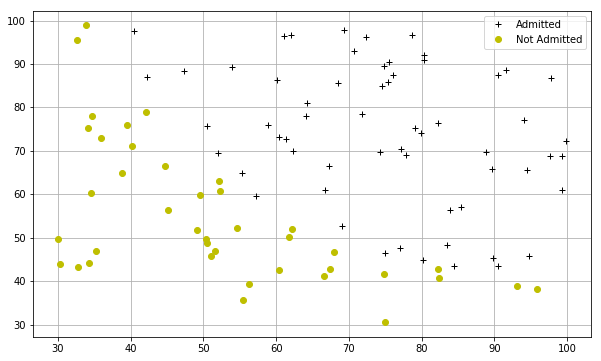

In [11]:
#pos와 neg를 각각 plotting하는 경우
def plotData():
    plt.figure(figsize=(10,6))
    plt.plot(pos[:,1], pos[:,2], 'k+', label='Admitted')
    plt.plot(neg[:,1], neg[:,2], 'yo', label='Not Admitted')
    plt.legend()
    plt.grid(True)
plotData()

1.2. implementation

In [12]:
from scipy.special import expit #시그모이드 함수를 벡터화

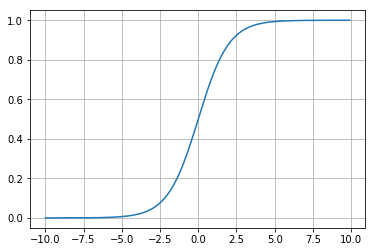

In [42]:
#시그모이드 함수 확인 
#원하는 (theta.T*x)를 시그모이드 함수에 넣어서 정리한다.
myx=np.arange(-10,10,.1)
plt.plot(myx,expit(myx))
plt.grid(True)

In [14]:
#logistic에 대해 hypothesis와 cost function
#expit은 시그모이드 함수 g를 의미한다. 
#Logistic hypothesus function
def h(mytheta, myX):
    return expit(np.dot(myX, mytheta)) #시그모이드 적용한 h

#Cost function include regularization term.
def computeCost(mytheta, myX, myy, mylambda=0.):
    term1 = np.dot(-np.array(myy).T,np.log(h(mytheta,myX)))
    term2 = np.dot((1-np.array(myy)).T,np.log(1-h(mytheta,myX)))
    regterm = (mylambda/2) * np.sum(np.dot(mytheta[1:].T,mytheta[1:])) #Skip theta0, regularization term.
    return float( (1./m) * ( np.sum(term1 - term2) + regterm ) )

In [18]:
#cost function을 min하게 해주는 theta를 찾는 작업
#실제로는 gradient descent 혹은 normal equation을 사용한다. 여기선 gradient descent방법 적용한 것을 의미한다 
from scipy import optimize

def optimizeTheta(mytheta,myX,myy,mylambda=0.):
    result = optimize.fmin(computeCost, x0=mytheta, args=(myX, myy, mylambda), maxiter=400, full_output=True)
    return result[0], result[1]

In [20]:
initial_theta = np.zeros((X.shape[1],1))
theta, mincost= optimizeTheta(initial_theta, X,y)

Optimization terminated successfully.
         Current function value: 0.203498
         Iterations: 157
         Function evaluations: 287


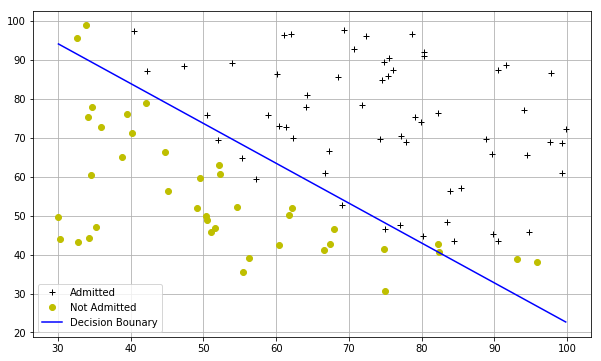

In [21]:
#구한 theta값에 대해 h식에 대입하여 decision boudary를 정한다
boundary_xs=np.array([np.min(X[:,1]), np.max(X[:,1])])
boundary_ys=(-1./theta[2])*(theta[0]+theta[1]*boundary_xs)
plotData() #data 분포를 2차원 시각화 

#expit의 특성에 따라 boundary를 정해준다. 
plt.plot(boundary_xs, boundary_ys, 'b-',label='Decision Bounary')
plt.legend()

### 2. Regularized Logistic Regression
to prevent overfitting problem

2.1 Visualizing the data

In [23]:
datafile='ex2data2.txt'
cols = np.loadtxt(datafile,delimiter=',',usecols=(0,1,2),unpack=True)
X = np.transpose(np.array(cols[:-1]))
y = np.transpose(np.array(cols[-1:]))
m = y.size # number of training examples
##Insert the usual column of 1's into the "X" matrix
X = np.insert(X,0,1,axis=1)

In [25]:
#negative의 경우와 positive의 경우의 파일을 나눈다.
pos = np.array([X[i] for i in range(X.shape[0]) if y[i] == 1])
neg = np.array([X[i] for i in range(X.shape[0]) if y[i] == 0])

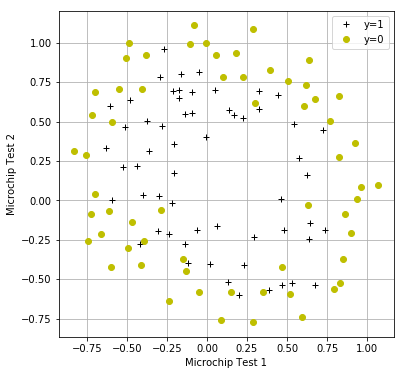

In [26]:
#plotting
def plotData():
    plt.plot(pos[:,1],pos[:,2],'k+',label='y=1')
    plt.plot(neg[:,1],neg[:,2],'yo',label='y=0')
    plt.xlabel('Microchip Test 1')
    plt.ylabel('Microchip Test 2')
    plt.legend()
    plt.grid(True)

#Draw it square to emphasize circular features
plt.figure(figsize=(6,6))
plotData()

2.2 Feature Mapping

In [32]:
def mapFeature( x1col, x2col ):
    """ 
    Function that takes in a column of n- x1's, a column of n- x2s, and builds
    a n- x 28-dim matrix of featuers as described in the homework assignment
    """
    degrees = 6
    out = np.ones( (x1col.shape[0], 1) )

    for i in range(1, degrees+1):
        for j in range(0, i+1):
            term1 = x1col ** (i-j)
            term2 = x2col ** (j)
            term  = (term1 * term2).reshape( term1.shape[0], 1 ) 
            out   = np.hstack(( out, term ))
    return out

In [34]:
mappedX = mapFeature(X[:,1],X[:,2])
mappedX

array([[ 1.00000000e+00,  5.12670000e-02,  6.99560000e-01, ...,
         6.29470940e-04,  8.58939846e-03,  1.17205992e-01],
       [ 1.00000000e+00, -9.27420000e-02,  6.84940000e-01, ...,
         1.89305413e-03, -1.39810280e-02,  1.03255971e-01],
       [ 1.00000000e+00, -2.13710000e-01,  6.92250000e-01, ...,
         1.04882142e-02, -3.39734512e-02,  1.10046893e-01],
       ...,
       [ 1.00000000e+00, -4.84450000e-01,  9.99270000e-01, ...,
         2.34007252e-01, -4.82684337e-01,  9.95627986e-01],
       [ 1.00000000e+00, -6.33640000e-03,  9.99270000e-01, ...,
         4.00328554e-05, -6.31330588e-03,  9.95627986e-01],
       [ 1.00000000e+00,  6.32650000e-01, -3.06120000e-02, ...,
         3.51474517e-07, -1.70067777e-08,  8.22905998e-10]])

2.3. Costfunction and gradient 

In [35]:
initial_theta=np.zeros((mappedX.shape[1],1))
computeCost(initial_theta, mappedX, y) #gradient방법을 사용하여 min(cost)의 값을 출력한다. 

0.6931471805599453

2.3.1 Learning parameters using fminunc

In [37]:
#overfitting문제를 해결하기 위한 regularization을 적용한다. 
#optimiaze.fmin은 regularization을 적용하지 않았을 떄의 optimiazed theta값
#optimized.minimize는 regualrization을 적용했을 떄의 optimized theta값
def optimizeRegularizedTheta(mytheta,myX,myy,mylambda=0.):
    result = optimize.minimize(computeCost, mytheta, args=(myX, myy, mylambda),  method='BFGS', options={"maxiter":500, "disp":False} )
    return np.array([result.x]), result.fun
    
theta, mincost = optimizeRegularizedTheta(initial_theta,mappedX,y)

### 2.4 plotting the decision boundary

In [40]:
def plotBoundary(mytheta, myX, myy, mylambda=0.):
    """
    Function to plot the decision boundary for arbitrary theta, X, y, lambda value
    Inside of this function is feature mapping, and the minimization routine.
    It works by making a grid of x1 ("xvals") and x2 ("yvals") points,
    And for each, computing whether the hypothesis classifies that point as
    True or False. Then, a contour is drawn with a built-in pyplot function.
    """
    theta, mincost = optimizeRegularizedTheta(mytheta,myX,myy,mylambda)
    xvals = np.linspace(-1,1.5,50)
    yvals = np.linspace(-1,1.5,50)
    zvals = np.zeros((len(xvals),len(yvals)))
    for i in range(len(xvals)):
        for j in range(len(yvals)):
            myfeaturesij = mapFeature(np.array([xvals[i]]),np.array([yvals[j]]))
            zvals[i][j] = np.dot(theta,myfeaturesij.T)
    zvals = zvals.transpose()

    u, v = np.meshgrid( xvals, yvals )
    mycontour = plt.contour( xvals, yvals, zvals, [0])
    #Kind of a hacky way to display a text on top of the decision boundary
    myfmt = { 0:'Lambda = %d'%mylambda}
    plt.clabel(mycontour, inline=1, fontsize=15, fmt=myfmt)
    plt.title("Decision Boundary")

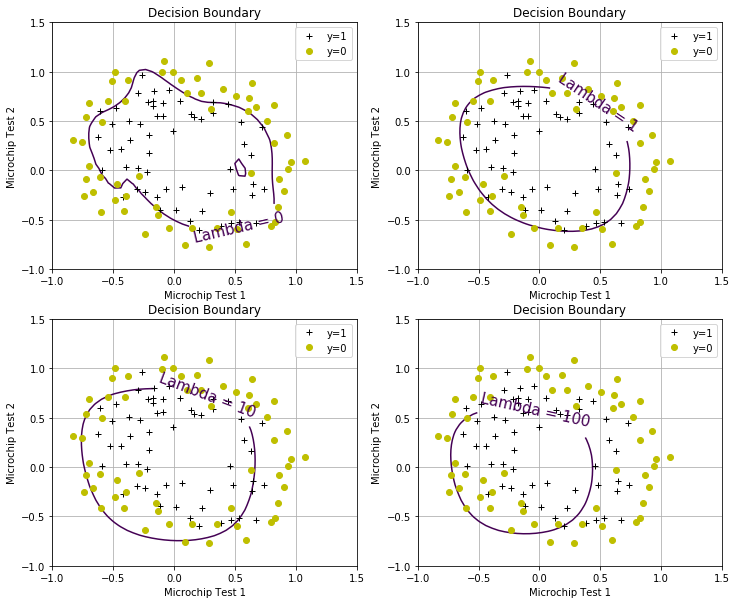

In [41]:
#Build a figure showing contours for various values of regularization parameter, lambda
#It shows for lambda=0 we are overfitting, and for lambda=100 we are underfitting
plt.figure(figsize=(12,10))
plt.subplot(221)
plotData()
plotBoundary(theta,mappedX,y,0.)

plt.subplot(222)
plotData()
plotBoundary(theta,mappedX,y,1.)

plt.subplot(223)
plotData()
plotBoundary(theta,mappedX,y,10.)

plt.subplot(224)
plotData()
plotBoundary(theta,mappedX,y,100.)